In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.stattools import jarque_bera
from statsmodels.graphics.api import plot_leverage_resid2, influence_plot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from itertools import combinations

In [2]:
uploaded = files.upload()

Saving deflator_yearly_agg.csv to deflator_yearly_agg.csv
Saving gdp_norm_monthly_agg.csv to gdp_norm_monthly_agg.csv
Saving general_cpi_monthly_agg.csv to general_cpi_monthly_agg.csv
Saving highway_interurban_yearly_agg.csv to highway_interurban_yearly_agg.csv
Saving highway_yearly_agg.csv to highway_yearly_agg.csv
Saving Household_debt_yearly_agg.csv to Household_debt_yearly_agg.csv
Saving Santiago_gdp_yearly_agg.csv to Santiago_gdp_yearly_agg.csv
Saving TCI_monthly_agg.csv to TCI_monthly_agg.csv
Saving unemployment_yearly_agg.csv to unemployment_yearly_agg.csv


In [3]:
df_deflator = pd.read_csv('deflator_yearly_agg.csv')
df_gdp_norm_monthly = pd.read_csv('gdp_norm_monthly_agg.csv')
df_cpi_monthly = pd.read_csv('general_cpi_monthly_agg.csv')
df_highway_inter = pd.read_csv('highway_interurban_yearly_agg.csv')
df_highway_urban = pd.read_csv('highway_yearly_agg.csv')
df_debt = pd.read_csv('Household_debt_yearly_agg.csv')
df_gdp_santiago = pd.read_csv('Santiago_gdp_yearly_agg.csv')
df_tci_monthly = pd.read_csv('TCI_monthly_agg.csv')
df_unemployment = pd.read_csv('unemployment_yearly_agg.csv')

# Prepare the DATA #
Aggregate
Standardize
Merge

## GDP Deflator

In [4]:
df_deflator

,EXTRACTIONDATE,Country Name,YEAR,DATE,deflator(annual%),LIKELIHOODOFDEFAULT
0,2024-03-23,Chile,2006,2006-12-31,12.349896,0.032722
1,2024-03-23,Chile,2007,2007-12-31,5.088757,0.048319
2,2024-03-23,Chile,2008,2008-12-31,0.311133,0.057514
3,2024-03-23,Chile,2009,2009-12-31,3.577795,0.065448
4,2024-03-23,Chile,2010,2010-12-31,8.857441,0.094427
5,2024-03-23,Chile,2011,2011-12-31,3.260515,0.101237
6,2024-03-23,Chile,2012,2012-12-31,0.763467,0.107576
7,2024-03-23,Chile,2013,2013-12-31,2.260771,0.068015
8,2024-03-23,Chile,2014,2014-12-31,5.852892,0.074191
9,2024-03-23,Chile,2015,2015-12-31,4.954366,0.081544


In [5]:
# Standardizing
scaler = StandardScaler()
df_deflator['Deflator_standardized'] = scaler.fit_transform(df_deflator[['deflator(annual%)']])

# Converting default rate to percentage
df_deflator['Default%'] = df_deflator['LIKELIHOODOFDEFAULT'] * 100

In [6]:
df_deflator

,EXTRACTIONDATE,Country Name,YEAR,DATE,deflator(annual%),LIKELIHOODOFDEFAULT,Deflator_standardized,Default%
0,2024-03-23,Chile,2006,2006-12-31,12.349896,0.032722,2.363925,3.2722
1,2024-03-23,Chile,2007,2007-12-31,5.088757,0.048319,0.048813,4.8319
2,2024-03-23,Chile,2008,2008-12-31,0.311133,0.057514,-1.474466,5.7514
3,2024-03-23,Chile,2009,2009-12-31,3.577795,0.065448,-0.432937,6.5448
4,2024-03-23,Chile,2010,2010-12-31,8.857441,0.094427,1.250405,9.4427
5,2024-03-23,Chile,2011,2011-12-31,3.260515,0.101237,-0.534097,10.1237
6,2024-03-23,Chile,2012,2012-12-31,0.763467,0.107576,-1.330246,10.7576
7,2024-03-23,Chile,2013,2013-12-31,2.260771,0.068015,-0.852852,6.8015
8,2024-03-23,Chile,2014,2014-12-31,5.852892,0.074191,0.292446,7.4191
9,2024-03-23,Chile,2015,2015-12-31,4.954366,0.081544,0.005964,8.1544


In [7]:
df_deflator = df_deflator[['YEAR', 'Deflator_standardized', 'Default%']]
df_deflator

,YEAR,Deflator_standardized,Default%
0,2006,2.363925,3.2722
1,2007,0.048813,4.8319
2,2008,-1.474466,5.7514
3,2009,-0.432937,6.5448
4,2010,1.250405,9.4427
5,2011,-0.534097,10.1237
6,2012,-1.330246,10.7576
7,2013,-0.852852,6.8015
8,2014,0.292446,7.4191
9,2015,0.005964,8.1544


## Chile GDP Normalized

In [8]:
df_gdp_norm_monthly

,EXTRACTIONDATE,OBSERVATION_DATE,GDP_NORMALIZED,YEAR,MONTH,LIKELIHOODOFDEFAULT
0,2024-03-31,2006-01-01,100.776983,2006,1,0.019363
1,2024-03-31,2006-02-01,100.804387,2006,2,0.017998
2,2024-03-31,2006-03-01,100.858167,2006,3,0.036930
3,2024-03-31,2006-04-01,100.934271,2006,4,0.036691
4,2024-03-31,2006-05-01,101.023159,2006,5,0.026561
...,...,...,...,...,...,...
186,2024-03-31,2021-07-01,100.708930,2021,7,0.144391
187,2024-03-31,2021-08-01,101.208495,2021,8,0.166013
188,2024-03-31,2021-09-01,101.663892,2021,9,0.157074
189,2024-03-31,2021-10-01,102.068399,2021,10,0.139014


In [9]:
# Aggregate by Year
df_gdp_norm = df_gdp_norm_monthly.groupby('YEAR')[['GDP_NORMALIZED','LIKELIHOODOFDEFAULT']].mean().reset_index()
df_gdp_norm.columns = ['YEAR', 'GDP_NORMALIZED', 'Default']
df_gdp_norm

,YEAR,GDP_NORMALIZED,Default
0,2006,101.183413,0.031147
1,2007,101.468835,0.048223
2,2008,100.991230,0.057578
3,2009,97.966464,0.065099
4,2010,99.035276,0.094541
5,2011,100.079240,0.100884
6,2012,100.863203,0.107263
7,2013,101.092995,0.066995
8,2014,100.393099,0.073519
9,2015,100.187323,0.081137


In [10]:
# Standardizing
scaler = StandardScaler()
df_gdp_norm['GDP_standardized'] = scaler.fit_transform(df_gdp_norm[['GDP_NORMALIZED']])

# Converting default rate to percentage
df_gdp_norm['Default%'] = df_gdp_norm['Default'] * 100

In [11]:
df_gdp_norm

,YEAR,GDP_NORMALIZED,Default,GDP_standardized,Default%
0,2006,101.183413,0.031147,0.828314,3.114750
1,2007,101.468835,0.048223,1.021430,4.822267
2,2008,100.991230,0.057578,0.698284,5.757800
3,2009,97.966464,0.065099,-1.348267,6.509900
4,2010,99.035276,0.094541,-0.625111,9.454142
5,2011,100.079240,0.100884,0.081233,10.088433
6,2012,100.863203,0.107263,0.611661,10.726350
7,2013,101.092995,0.066995,0.767137,6.699517
8,2014,100.393099,0.073519,0.293589,7.351858
9,2015,100.187323,0.081137,0.154362,8.113717


In [12]:
df_gdp_norm = df_gdp_norm[['YEAR', 'GDP_standardized', 'Default%']]
df_gdp_norm

,YEAR,GDP_standardized,Default%
0,2006,0.828314,3.114750
1,2007,1.021430,4.822267
2,2008,0.698284,5.757800
3,2009,-1.348267,6.509900
4,2010,-0.625111,9.454142
5,2011,0.081233,10.088433
6,2012,0.611661,10.726350
7,2013,0.767137,6.699517
8,2014,0.293589,7.351858
9,2015,0.154362,8.113717


## Chile GDP Normalized Moving Average (window size: 2)

In [13]:
df_gdp_ma = df_gdp_norm_monthly.groupby('YEAR')[['GDP_NORMALIZED','LIKELIHOODOFDEFAULT']].mean().reset_index()
df_gdp_ma.columns = ['YEAR', 'GDP_NORMALIZED', 'Default']
df_gdp_ma

,YEAR,GDP_NORMALIZED,Default
0,2006,101.183413,0.031147
1,2007,101.468835,0.048223
2,2008,100.991230,0.057578
3,2009,97.966464,0.065099
4,2010,99.035276,0.094541
5,2011,100.079240,0.100884
6,2012,100.863203,0.107263
7,2013,101.092995,0.066995
8,2014,100.393099,0.073519
9,2015,100.187323,0.081137


In [14]:
# Calculate moving averages
#window_size = 2  # 12 periods moving average
#df_gdp_ma['GDP_MA'] = df_gdp_ma['GDP_NORMALIZED'].rolling(window=window_size).mean()

# Drop NA values that result from moving average calculation
#df_gdp_ma.dropna(inplace=True)

# Prepare data for linear regression
#X_ma = df_gdp_ma['GDP_MA']
#X_ma = sm.add_constant(X_ma)  # adding a constant to the model
#y_ma = df_gdp_ma['Default']

# Fit regression model
#ma_model = sm.OLS(y_ma, X_ma).fit()

# Print the summary of the model
#print(ma_model.summary())

In [15]:
results = []

for window_size in range(2, 15):
    # Calculate moving averages
    df_gdp_ma['GDP_MA'] = df_gdp_ma['GDP_NORMALIZED'].rolling(window=window_size).mean()

    # Drop NA values that result from moving average calculation
    df_valid = df_gdp_ma.dropna()

    # Prepare data for linear regression
    X_ma = df_valid['GDP_MA']
    X_ma = sm.add_constant(X_ma)  # adding a constant to the model
    y_ma = df_valid['Default']

    # Fit regression model
    ma_model = sm.OLS(y_ma, X_ma).fit()

    # Retrieve the model's parameters
    intercept, slope = ma_model.params
    intercept_pvalue, slope_pvalue = ma_model.pvalues
    dw_score = durbin_watson(ma_model.resid)

    # Store results in list
    results.append({
        'Window Size': window_size,
        'Slope': slope,
        'Slope P-Value': slope_pvalue,
        'Durbin-Watson Score': dw_score
    })

# Print results
for result in results:
    print(f"Window Size: {result['Window Size']}")
    print(f"Slope: {result['Slope']:.3f}, P-value: {result['Slope P-Value']:.3f}")
    print(f"Durbin-Watson Score: {result['Durbin-Watson Score']:.3f}")
    print('---')

Window Size: 2
Slope: -0.021, P-value: 0.000
Durbin-Watson Score: 0.982
---
Window Size: 3
Slope: -0.031, P-value: 0.000
Durbin-Watson Score: 1.004
---
Window Size: 4
Slope: -0.044, P-value: 0.000
Durbin-Watson Score: 0.670
---
Window Size: 5
Slope: -0.046, P-value: 0.004
Durbin-Watson Score: 1.092
---
Window Size: 6
Slope: -0.052, P-value: 0.015
Durbin-Watson Score: 0.892
---
Window Size: 7
Slope: -0.061, P-value: 0.022
Durbin-Watson Score: 0.824
---
Window Size: 8
Slope: -0.082, P-value: 0.012
Durbin-Watson Score: 0.436
---
Window Size: 9
Slope: -0.096, P-value: 0.023
Durbin-Watson Score: 0.816
---
Window Size: 10
Slope: -0.121, P-value: 0.030
Durbin-Watson Score: 1.303
---
Window Size: 11
Slope: -0.127, P-value: 0.024
Durbin-Watson Score: 1.133
---
Window Size: 12
Slope: -0.098, P-value: 0.023
Durbin-Watson Score: 2.049
---
Window Size: 13
Slope: -0.090, P-value: 0.005
Durbin-Watson Score: 3.198
---
Window Size: 14
Slope: -0.091, P-value: 0.019
Durbin-Watson Score: 2.739
---


In [16]:
df_gdp_ma_final = df_gdp_norm_monthly.groupby('YEAR')[['GDP_NORMALIZED','LIKELIHOODOFDEFAULT']].mean().reset_index()
df_gdp_ma_final.columns = ['YEAR', 'GDP_NORMALIZED', 'Default']
df_gdp_ma_final['GDP_MA'] = df_gdp_ma_final['GDP_NORMALIZED'].rolling(window=2).mean()

# Standardizing
scaler = StandardScaler()
df_gdp_ma_final['GDP_MA_standardized'] = scaler.fit_transform(df_gdp_ma_final[['GDP_MA']])

# Converting default rate to percentage
df_gdp_ma_final['Default%'] = df_gdp_ma_final['Default'] * 100

df_gdp_ma_final = df_gdp_ma_final.dropna()
df_gdp_ma_final = df_gdp_ma_final[['YEAR', 'GDP_MA_standardized', 'Default%']]
df_gdp_ma_final

,YEAR,GDP_MA_standardized,Default%
1,2007,1.296692,4.822267
2,2008,1.208900,5.757800
3,2009,-0.391019,6.509900
4,2010,-1.284519,9.454142
5,2011,-0.319381,10.088433
6,2012,0.515635,10.726350
7,2013,0.978728,6.699517
8,2014,0.763980,7.351858
9,2015,0.350260,8.113717
10,2016,0.074117,9.741817


## Chile GDP Normalized Growth Rate

In [17]:
df_gdp_gr = df_gdp_norm_monthly.groupby('YEAR')[['GDP_NORMALIZED','LIKELIHOODOFDEFAULT']].mean().reset_index()
df_gdp_gr.columns = ['YEAR', 'GDP_NORMALIZED', 'Default']
df_gdp_gr

,YEAR,GDP_NORMALIZED,Default
0,2006,101.183413,0.031147
1,2007,101.468835,0.048223
2,2008,100.991230,0.057578
3,2009,97.966464,0.065099
4,2010,99.035276,0.094541
5,2011,100.079240,0.100884
6,2012,100.863203,0.107263
7,2013,101.092995,0.066995
8,2014,100.393099,0.073519
9,2015,100.187323,0.081137


In [18]:
#Calculate growth rate into column
df_gdp_gr['GDP_NORMALIZED'] = pd.to_numeric(df_gdp_gr['GDP_NORMALIZED'], errors='coerce')
df_gdp_gr['GDP_Growth_Rate'] = df_gdp_gr['GDP_NORMALIZED'].pct_change()
df_gdp_gr['GDP_Growth_Rate'] = df_gdp_gr['GDP_Growth_Rate'] * 100
df_gdp_gr

,YEAR,GDP_NORMALIZED,Default,GDP_Growth_Rate
0,2006,101.183413,0.031147,NaN
1,2007,101.468835,0.048223,0.282084
2,2008,100.991230,0.057578,-0.470692
3,2009,97.966464,0.065099,-2.995077
4,2010,99.035276,0.094541,1.090998
5,2011,100.079240,0.100884,1.054133
6,2012,100.863203,0.107263,0.783342
7,2013,101.092995,0.066995,0.227825
8,2014,100.393099,0.073519,-0.692329
9,2015,100.187323,0.081137,-0.204970


In [19]:
df_gdp_gr_final = df_gdp_gr.copy()

# Standardizing
scaler = StandardScaler()
df_gdp_gr_final['GDP_GR_standardized'] = scaler.fit_transform(df_gdp_gr_final[['GDP_Growth_Rate']])

# Converting default rate to percentage
df_gdp_gr_final['Default%'] = df_gdp_gr_final['Default'] * 100

In [20]:
df_gdp_gr_final = df_gdp_gr_final[['YEAR', 'GDP_GR_standardized', 'Default%']].dropna()
df_gdp_gr_final

,YEAR,GDP_GR_standardized,Default%
1,2007,0.150616,4.822267
2,2008,-0.206041,5.757800
3,2009,-1.402068,6.509900
4,2010,0.533871,9.454142
5,2011,0.516405,10.088433
6,2012,0.388107,10.726350
7,2013,0.124909,6.699517
8,2014,-0.311050,7.351858
9,2015,-0.080145,8.113717
10,2016,-0.171591,9.741817


## Chile GDP Normalized Growth Rate Moving Average (window size: 2)

In [21]:
df_gdp_grma = df_gdp_gr.copy().dropna()
df_gdp_grma

,YEAR,GDP_NORMALIZED,Default,GDP_Growth_Rate
1,2007,101.468835,0.048223,0.282084
2,2008,100.991230,0.057578,-0.470692
3,2009,97.966464,0.065099,-2.995077
4,2010,99.035276,0.094541,1.090998
5,2011,100.079240,0.100884,1.054133
6,2012,100.863203,0.107263,0.783342
7,2013,101.092995,0.066995,0.227825
8,2014,100.393099,0.073519,-0.692329
9,2015,100.187323,0.081137,-0.204970
10,2016,99.788597,0.097418,-0.397981


In [22]:
# Calculate moving averages
#window_size = 5  # 12 periods moving average
#df_gdp_grma['GDP_GRMA'] = df_gdp_grma['GDP_Growth_Rate'].rolling(window=window_size).mean()

# Drop NA values that result from moving average calculation
#df_gdp_grma.dropna(inplace=True)

# Prepare data for linear regression
#X_ma = df_gdp_grma['GDP_GRMA']
#X_ma = sm.add_constant(X_ma)  # adding a constant to the model
#y_ma = df_gdp_grma['Default']

# Fit regression model
#ma_model = sm.OLS(y_ma, X_ma).fit()

# Print the summary of the model
#print(ma_model.summary())

In [23]:
results = []

for window_size in range(2, 13):
    # Calculate moving averages
    df_gdp_grma['GDP_GRMA'] = df_gdp_grma['GDP_Growth_Rate'].rolling(window=window_size).mean()

    # Drop NA values that result from moving average calculation
    df_valid = df_gdp_grma.dropna()

    # Prepare data for linear regression
    X_ma = df_valid['GDP_GRMA']
    X_ma = sm.add_constant(X_ma)  # adding a constant to the model
    y_ma = df_valid['Default']

    # Fit regression model
    ma_model = sm.OLS(y_ma, X_ma).fit()

    # Retrieve the model's parameters
    intercept, slope = ma_model.params
    intercept_pvalue, slope_pvalue = ma_model.pvalues
    dw_score = durbin_watson(ma_model.resid)

    # Store results in list
    results.append({
        'Window Size': window_size,
        'Slope': slope,
        'Slope P-Value': slope_pvalue,
        'Durbin-Watson Score': dw_score
    })

# Print results
for result in results:
    print(f"Window Size: {result['Window Size']}")
    print(f"Slope: {result['Slope']:.3f}, P-value: {result['Slope P-Value']:.3f}")
    print(f"Durbin-Watson Score: {result['Durbin-Watson Score']:.3f}")
    print('---')

Window Size: 2
Slope: -0.004, P-value: 0.634
Durbin-Watson Score: 0.449
---
Window Size: 3
Slope: -0.008, P-value: 0.504
Durbin-Watson Score: 0.546
---
Window Size: 4
Slope: -0.027, P-value: 0.099
Durbin-Watson Score: 0.560
---
Window Size: 5
Slope: -0.040, P-value: 0.092
Durbin-Watson Score: 0.963
---
Window Size: 6
Slope: -0.044, P-value: 0.163
Durbin-Watson Score: 0.883
---
Window Size: 7
Slope: -0.041, P-value: 0.267
Durbin-Watson Score: 0.508
---
Window Size: 8
Slope: -0.046, P-value: 0.266
Durbin-Watson Score: 0.422
---
Window Size: 9
Slope: -0.040, P-value: 0.402
Durbin-Watson Score: 0.370
---
Window Size: 10
Slope: -0.022, P-value: 0.751
Durbin-Watson Score: 0.353
---
Window Size: 11
Slope: 0.051, P-value: 0.680
Durbin-Watson Score: 0.839
---
Window Size: 12
Slope: -0.001, P-value: 0.986
Durbin-Watson Score: 0.669
---


In [24]:
df_gdp_grma_final = df_gdp_gr.copy().dropna()
df_gdp_grma_final['GDP_GRMA'] = df_gdp_grma_final['GDP_Growth_Rate'].rolling(window=2).mean()

# Standardizing
scaler = StandardScaler()
df_gdp_grma_final['GDP_GRMA_standardized'] = scaler.fit_transform(df_gdp_grma_final[['GDP_GRMA']])

# Converting default rate to percentage
df_gdp_grma_final['Default%'] = df_gdp_grma_final['Default'] * 100

df_gdp_grma_final = df_gdp_grma_final.dropna()
df_gdp_grma_final = df_gdp_grma_final[['YEAR', 'GDP_GRMA_standardized', 'Default%']]
df_gdp_grma_final

,YEAR,GDP_GRMA_standardized,Default%
2,2008,0.143853,5.757800
3,2009,-1.509724,6.509900
4,2010,-0.721733,9.454142
5,2011,1.321401,10.088433
6,2012,1.166165,10.726350
7,2013,0.749230,6.699517
8,2014,0.004642,7.351858
9,2015,-0.213735,8.113717
10,2016,-0.065215,9.741817
11,2017,-0.020818,9.734392


## CPI

In [25]:
df_cpi_monthly

,EXTRACTIONDATE,REG,Descripción series,Date (varchar),Date (#),IPC,YEAR,MONTH,LIKELIHOODOFDEFAULT,DATE
0,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Jan.2009,2009-01-01,59.05,2009,1,0.052036,2009-01-01
1,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Feb.2009,2009-02-01,58.28,2009,2,0.050888,2009-02-01
2,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Mar.2009,2009-03-01,58.30,2009,3,0.050589,2009-03-01
3,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Apr.2009,2009-04-01,58.21,2009,4,0.058679,2009-04-01
4,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),May.2009,2009-05-01,58.09,2009,5,0.065349,2009-05-01
...,...,...,...,...,...,...,...,...,...,...
176,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Sep.2023,2023-09-01,100.53,2023,9,0.293259,2023-09-01
177,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Oct.2023,2023-10-01,100.82,2023,10,0.267782,2023-10-01
178,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Nov.2023,2023-11-01,101.58,2023,11,0.360104,2023-11-01
179,2024-03-21 21:55:32.380,1.0,IPC general (empalme BCCh),Dec.2023,2023-12-01,101.04,2023,12,0.439466,2023-12-01


In [26]:
# Aggregate by Year
df_cpi = df_cpi_monthly.groupby('YEAR')[['IPC','LIKELIHOODOFDEFAULT']].mean().reset_index()
df_cpi.columns = ['YEAR', 'CPI', 'Default']
df_cpi

,YEAR,CPI,Default
0,2009,58.250833,0.065099
1,2010,59.073333,0.094541
2,2011,61.045833,0.100884
3,2012,62.880000,0.107263
4,2013,64.095000,0.066995
5,2014,66.911667,0.073519
6,2015,69.823333,0.081137
7,2016,72.466667,0.097418
8,2017,74.048333,0.097344
9,2018,75.761667,0.097419


In [27]:
# Standardizing
scaler = StandardScaler()
df_cpi['CPI_standardized'] = scaler.fit_transform(df_cpi[['CPI']])

# Converting default rate to percentage
df_cpi['Default%'] = df_cpi['Default'] * 100

In [28]:
df_cpi

,YEAR,CPI,Default,CPI_standardized,Default%
0,2009,58.250833,0.065099,-1.251736,6.509900
1,2010,59.073333,0.094541,-1.190261,9.454142
2,2011,61.045833,0.100884,-1.042833,10.088433
3,2012,62.880000,0.107263,-0.905744,10.726350
4,2013,64.095000,0.066995,-0.814932,6.699517
5,2014,66.911667,0.073519,-0.604409,7.351858
6,2015,69.823333,0.081137,-0.386786,8.113717
7,2016,72.466667,0.097418,-0.189218,9.741817
8,2017,74.048333,0.097344,-0.071001,9.734392
9,2018,75.761667,0.097419,0.057057,9.741892


In [29]:
df_cpi = df_cpi[['YEAR', 'CPI_standardized', 'Default%']]
df_cpi

,YEAR,CPI_standardized,Default%
0,2009,-1.251736,6.509900
1,2010,-1.190261,9.454142
2,2011,-1.042833,10.088433
3,2012,-0.905744,10.726350
4,2013,-0.814932,6.699517
5,2014,-0.604409,7.351858
6,2015,-0.386786,8.113717
7,2016,-0.189218,9.741817
8,2017,-0.071001,9.734392
9,2018,0.057057,9.741892


## CPI Moving Average (window size: 2)

In [30]:
df_cpi_ma = df_cpi_monthly.groupby('YEAR')[['IPC','LIKELIHOODOFDEFAULT']].mean().reset_index()
df_cpi_ma.columns = ['YEAR', 'CPI', 'Default']
df_cpi_ma

,YEAR,CPI,Default
0,2009,58.250833,0.065099
1,2010,59.073333,0.094541
2,2011,61.045833,0.100884
3,2012,62.880000,0.107263
4,2013,64.095000,0.066995
5,2014,66.911667,0.073519
6,2015,69.823333,0.081137
7,2016,72.466667,0.097418
8,2017,74.048333,0.097344
9,2018,75.761667,0.097419


In [31]:
# Calculate moving averages
#window_size = 2  # 12 periods moving average
#df_cpi_ma['CPI_MA'] = df_cpi_ma['CPI'].rolling(window=window_size).mean()

# Drop NA values that result from moving average calculation
#df_cpi_ma.dropna(inplace=True)

# Prepare data for linear regression
#X_ma = df_cpi_ma['CPI_MA']
#X_ma = sm.add_constant(X_ma)  # adding a constant to the model
#y_ma = df_cpi_ma['Default']

# Fit regression model
#ma_model = sm.OLS(y_ma, X_ma).fit()

# Print the summary of the model
#print(ma_model.summary())

In [32]:
results = []

for window_size in range(2, 15):
    # Calculate moving averages
    df_cpi_ma['CPI_MA'] = df_cpi_ma['CPI'].rolling(window=window_size).mean()

    # Drop NA values that result from moving average calculation
    df_valid = df_cpi_ma.dropna()

    # Prepare data for linear regression
    X_ma = df_valid['CPI_MA']
    X_ma = sm.add_constant(X_ma)  # adding a constant to the model
    y_ma = df_valid['Default']

    # Fit regression model
    ma_model = sm.OLS(y_ma, X_ma).fit()

    # Retrieve the model's parameters
    intercept, slope = ma_model.params
    intercept_pvalue, slope_pvalue = ma_model.pvalues
    dw_score = durbin_watson(ma_model.resid)

    # Store results in list
    results.append({
        'Window Size': window_size,
        'Slope': slope,
        'Slope P-Value': slope_pvalue,
        'Durbin-Watson Score': dw_score
    })

# Print results
for result in results:
    print(f"Window Size: {result['Window Size']}")
    print(f"Slope: {result['Slope']:.3f}, P-value: {result['Slope P-Value']:.3f}")
    print(f"Durbin-Watson Score: {result['Durbin-Watson Score']:.3f}")
    print('---')

Window Size: 2
Slope: 0.010, P-value: 0.001
Durbin-Watson Score: 1.126
---
Window Size: 3
Slope: 0.012, P-value: 0.001
Durbin-Watson Score: 1.085
---
Window Size: 4
Slope: 0.014, P-value: 0.002
Durbin-Watson Score: 1.105
---
Window Size: 5
Slope: 0.016, P-value: 0.002
Durbin-Watson Score: 1.146
---
Window Size: 6
Slope: 0.018, P-value: 0.004
Durbin-Watson Score: 1.176
---
Window Size: 7
Slope: 0.020, P-value: 0.006
Durbin-Watson Score: 1.226
---
Window Size: 8
Slope: 0.023, P-value: 0.010
Durbin-Watson Score: 1.305
---
Window Size: 9
Slope: 0.027, P-value: 0.013
Durbin-Watson Score: 1.413
---
Window Size: 10
Slope: 0.033, P-value: 0.020
Durbin-Watson Score: 1.524
---
Window Size: 11
Slope: 0.039, P-value: 0.035
Durbin-Watson Score: 1.628
---
Window Size: 12
Slope: 0.048, P-value: 0.068
Durbin-Watson Score: 1.797
---
Window Size: 13
Slope: 0.064, P-value: 0.118
Durbin-Watson Score: 2.177
---
Window Size: 14
Slope: 0.095, P-value: 0.239
Durbin-Watson Score: 3.000
---


In [33]:
df_cpi_ma_final = df_cpi_monthly.groupby('YEAR')[['IPC','LIKELIHOODOFDEFAULT']].mean().reset_index()
df_cpi_ma_final.columns = ['YEAR', 'CPI', 'Default']
df_cpi_ma_final['CPI_MA'] = df_cpi_ma_final['CPI'].rolling(window=2).mean()

# Standardizing
scaler = StandardScaler()
df_cpi_ma_final['CPI_MA_standardized'] = scaler.fit_transform(df_cpi_ma_final[['CPI_MA']])

# Converting default rate to percentage
df_cpi_ma_final['Default%'] = df_cpi_ma_final['Default'] * 100

df_cpi_ma_final = df_cpi_ma_final.dropna()
df_cpi_ma_final = df_cpi_ma_final[['YEAR', 'CPI_MA_standardized', 'Default%']]
df_cpi_ma_final

,YEAR,CPI_MA_standardized,Default%
1,2010,-1.288444,9.454142
2,2011,-1.175932,10.088433
3,2012,-1.022697,10.726350
4,2013,-0.899954,6.699517
5,2014,-0.737661,7.351858
6,2015,-0.507070,8.113717
7,2016,-0.283457,9.741817
8,2017,-0.113381,9.734392
9,2018,0.019257,9.741892
10,2019,0.157028,10.894342


## CPI Growth Rate

In [34]:
df_cpi_gr = df_cpi_monthly.groupby('YEAR')[['IPC','LIKELIHOODOFDEFAULT']].mean().reset_index()
df_cpi_gr.columns = ['YEAR', 'CPI', 'Default']
df_cpi_gr

,YEAR,CPI,Default
0,2009,58.250833,0.065099
1,2010,59.073333,0.094541
2,2011,61.045833,0.100884
3,2012,62.880000,0.107263
4,2013,64.095000,0.066995
5,2014,66.911667,0.073519
6,2015,69.823333,0.081137
7,2016,72.466667,0.097418
8,2017,74.048333,0.097344
9,2018,75.761667,0.097419


In [35]:
#Calculate growth rate into column
df_cpi_gr['CPI'] = pd.to_numeric(df_cpi_gr['CPI'], errors='coerce')
df_cpi_gr['CPI_Growth_Rate'] = df_cpi_gr['CPI'].pct_change()
df_cpi_gr['CPI_Growth_Rate'] = df_cpi_gr['CPI_Growth_Rate'] * 100
df_cpi_gr

,YEAR,CPI,Default,CPI_Growth_Rate
0,2009,58.250833,0.065099,NaN
1,2010,59.073333,0.094541,1.411997
2,2011,61.045833,0.100884,3.339070
3,2012,62.880000,0.107263,3.004573
4,2013,64.095000,0.066995,1.932252
5,2014,66.911667,0.073519,4.394519
6,2015,69.823333,0.081137,4.351508
7,2016,72.466667,0.097418,3.785745
8,2017,74.048333,0.097344,2.182613
9,2018,75.761667,0.097419,2.313804


In [36]:
df_cpi_gr_final = df_cpi_gr.copy()

# Standardizing
scaler = StandardScaler()
df_cpi_gr_final['CPI_GR_standardized'] = scaler.fit_transform(df_cpi_gr_final[['CPI_Growth_Rate']])

# Converting default rate to percentage
df_cpi_gr_final['Default%'] = df_cpi_gr_final['Default'] * 100

In [37]:
df_cpi_gr_final = df_cpi_gr_final[['YEAR', 'CPI_GR_standardized', 'Default%']].dropna()
df_cpi_gr_final

,YEAR,CPI_GR_standardized,Default%
1,2010,-0.943483,9.454142
2,2011,-0.187399,10.088433
3,2012,-0.318638,10.726350
4,2013,-0.739362,6.699517
5,2014,0.226704,7.351858
6,2015,0.209829,8.113717
7,2016,-0.012147,9.741817
8,2017,-0.641133,9.734392
9,2018,-0.589660,9.741892
10,2019,-0.612348,10.894342


## CPI Growth Rate Moving Average (window size: 2)

In [38]:
df_cpi_grma = df_cpi_gr.copy().dropna()
df_cpi_grma

,YEAR,CPI,Default,CPI_Growth_Rate
1,2010,59.073333,0.094541,1.411997
2,2011,61.045833,0.100884,3.339070
3,2012,62.880000,0.107263,3.004573
4,2013,64.095000,0.066995,1.932252
5,2014,66.911667,0.073519,4.394519
6,2015,69.823333,0.081137,4.351508
7,2016,72.466667,0.097418,3.785745
8,2017,74.048333,0.097344,2.182613
9,2018,75.761667,0.097419,2.313804
10,2019,77.470833,0.108943,2.255978


In [39]:
# Calculate moving averages
#window_size = 2  # 12 periods moving average
#df_cpi_grma['CPI_GRMA'] = df_cpi_grma['CPI_Growth_Rate'].rolling(window=window_size).mean()

# Drop NA values that result from moving average calculation
#df_cpi_grma.dropna(inplace=True)

# Prepare data for linear regression
#X_ma = df_cpi_grma['CPI_GRMA']
#X_ma = sm.add_constant(X_ma)  # adding a constant to the model
#y_ma = df_cpi_grma['Default']

# Fit regression model
#ma_model = sm.OLS(y_ma, X_ma).fit()

# Print the summary of the model
#print(ma_model.summary())

In [40]:
results = []

for window_size in range(2, 14):
    # Calculate moving averages
    df_cpi_grma['CPI_GRMA'] = df_cpi_grma['CPI_Growth_Rate'].rolling(window=window_size).mean()

    # Drop NA values that result from moving average calculation
    df_valid = df_cpi_grma.dropna()

    # Prepare data for linear regression
    X_ma = df_valid['CPI_GRMA']
    X_ma = sm.add_constant(X_ma)  # adding a constant to the model
    y_ma = df_valid['Default']

    # Fit regression model
    ma_model = sm.OLS(y_ma, X_ma).fit()

    # Retrieve the model's parameters
    intercept, slope = ma_model.params
    intercept_pvalue, slope_pvalue = ma_model.pvalues
    dw_score = durbin_watson(ma_model.resid)

    # Store results in list
    results.append({
        'Window Size': window_size,
        'Slope': slope,
        'Slope P-Value': slope_pvalue,
        'Durbin-Watson Score': dw_score
    })

# Print results
for result in results:
    print(f"Window Size: {result['Window Size']}")
    print(f"Slope: {result['Slope']:.3f}, P-value: {result['Slope P-Value']:.3f}")
    print(f"Durbin-Watson Score: {result['Durbin-Watson Score']:.3f}")
    print('---')

Window Size: 2
Slope: 0.026, P-value: 0.260
Durbin-Watson Score: 1.062
---
Window Size: 3
Slope: 0.067, P-value: 0.012
Durbin-Watson Score: 1.539
---
Window Size: 4
Slope: 0.093, P-value: 0.009
Durbin-Watson Score: 1.626
---
Window Size: 5
Slope: 0.129, P-value: 0.010
Durbin-Watson Score: 1.742
---
Window Size: 6
Slope: 0.177, P-value: 0.013
Durbin-Watson Score: 1.870
---
Window Size: 7
Slope: 0.218, P-value: 0.023
Durbin-Watson Score: 1.782
---
Window Size: 8
Slope: 0.207, P-value: 0.083
Durbin-Watson Score: 1.607
---
Window Size: 9
Slope: 0.193, P-value: 0.151
Durbin-Watson Score: 1.595
---
Window Size: 10
Slope: 0.207, P-value: 0.195
Durbin-Watson Score: 1.695
---
Window Size: 11
Slope: 0.248, P-value: 0.250
Durbin-Watson Score: 1.685
---
Window Size: 12
Slope: 0.263, P-value: 0.493
Durbin-Watson Score: 1.718
---
Window Size: 13
Slope: 0.505, P-value: 0.746
Durbin-Watson Score: 1.989
---


In [41]:
df_cpi_grma_final = df_cpi_gr.copy().dropna()
df_cpi_grma_final['CPI_GRMA'] = df_cpi_grma_final['CPI_Growth_Rate'].rolling(window=2).mean()

# Standardizing
scaler = StandardScaler()
df_cpi_grma_final['CPI_GRMA_standardized'] = scaler.fit_transform(df_cpi_grma_final[['CPI_GRMA']])

# Converting default rate to percentage
df_cpi_grma_final['Default%'] = df_cpi_grma_final['Default'] * 100

df_cpi_grma_final = df_cpi_grma_final.dropna()
df_cpi_grma_final = df_cpi_grma_final[['YEAR', 'CPI_GRMA_standardized', 'Default%']]
df_cpi_grma_final

,YEAR,CPI_GRMA_standardized,Default%
2,2011,-0.757628,10.088433
3,2012,-0.381028,10.726350
4,2013,-0.713702,6.699517
5,2014,-0.385017,7.351858
6,2015,0.187071,8.113717
7,2016,0.043112,9.741817
8,2017,-0.469772,9.734392
9,2018,-0.817846,9.741892
10,2019,-0.800497,10.894342
11,2020,-0.628043,14.648750


## Interurban Highway

In [42]:
df_highway_inter

,EXTRACTIONDATE,REG,Descripción series,YEAR,DATE,INDEX,LIKELIHOODOFDEFAULT
0,2024-03-23,15.0,Pasada de vehículos por plazas de peajes y pór...,2014,2014-12-31,9.557303e+06,0.074191
1,2024-03-23,15.0,Pasada de vehículos por plazas de peajes y pór...,2015,2015-12-31,1.048325e+07,0.081544
2,2024-03-23,15.0,Pasada de vehículos por plazas de peajes y pór...,2016,2016-12-31,1.182673e+07,0.099478
3,2024-03-23,15.0,Pasada de vehículos por plazas de peajes y pór...,2017,2017-12-31,1.352149e+07,0.099008
4,2024-03-23,15.0,Pasada de vehículos por plazas de peajes y pór...,2018,2018-12-31,1.735575e+07,0.096684
5,2024-03-23,15.0,Pasada de vehículos por plazas de peajes y pór...,2019,2019-12-31,2.167174e+07,0.108227
6,2024-03-23,15.0,Pasada de vehículos por plazas de peajes y pór...,2020,2020-12-31,1.624858e+07,0.145762
7,2024-03-23,15.0,Pasada de vehículos por plazas de peajes y pór...,2021,2021-12-31,2.206913e+07,0.153499
8,2024-03-23,15.0,Pasada de vehículos por plazas de peajes y pór...,2022,2022-12-31,2.501330e+07,0.181699
9,2024-03-23,15.0,Pasada de vehículos por plazas de peajes y pór...,2023,2023-12-31,2.450204e+07,0.265869


In [43]:
# Standardizing
scaler = StandardScaler()
df_highway_inter['Inter_Highway_standardized'] = scaler.fit_transform(df_highway_inter[['INDEX']])

# Converting default rate to percentage
df_highway_inter['Default%'] = df_highway_inter['LIKELIHOODOFDEFAULT'] * 100

In [44]:
df_highway_inter

,EXTRACTIONDATE,REG,Descripción series,YEAR,DATE,INDEX,LIKELIHOODOFDEFAULT,Inter_Highway_standardized,Default%
0,2024-03-23,15.0,Pasada de vehículos por plazas de peajes y pór...,2014,2014-12-31,9.557303e+06,0.074191,-1.388561,7.4191
1,2024-03-23,15.0,Pasada de vehículos por plazas de peajes y pór...,2015,2015-12-31,1.048325e+07,0.081544,-1.220877,8.1544
2,2024-03-23,15.0,Pasada de vehículos por plazas de peajes y pór...,2016,2016-12-31,1.182673e+07,0.099478,-0.977581,9.9478
3,2024-03-23,15.0,Pasada de vehículos por plazas de peajes y pór...,2017,2017-12-31,1.352149e+07,0.099008,-0.670670,9.9008
4,2024-03-23,15.0,Pasada de vehículos por plazas de peajes y pór...,2018,2018-12-31,1.735575e+07,0.096684,0.023690,9.6684
5,2024-03-23,15.0,Pasada de vehículos por plazas de peajes y pór...,2019,2019-12-31,2.167174e+07,0.108227,0.805290,10.8227
6,2024-03-23,15.0,Pasada de vehículos por plazas de peajes y pór...,2020,2020-12-31,1.624858e+07,0.145762,-0.176812,14.5762
7,2024-03-23,15.0,Pasada de vehículos por plazas de peajes y pór...,2021,2021-12-31,2.206913e+07,0.153499,0.877254,15.3499
8,2024-03-23,15.0,Pasada de vehículos por plazas de peajes y pór...,2022,2022-12-31,2.501330e+07,0.181699,1.410426,18.1699
9,2024-03-23,15.0,Pasada de vehículos por plazas de peajes y pór...,2023,2023-12-31,2.450204e+07,0.265869,1.317840,26.5869


In [45]:
df_highway_inter = df_highway_inter[['YEAR', 'Inter_Highway_standardized', 'Default%']]
df_highway_inter

,YEAR,Inter_Highway_standardized,Default%
0,2014,-1.388561,7.4191
1,2015,-1.220877,8.1544
2,2016,-0.977581,9.9478
3,2017,-0.670670,9.9008
4,2018,0.023690,9.6684
5,2019,0.805290,10.8227
6,2020,-0.176812,14.5762
7,2021,0.877254,15.3499
8,2022,1.410426,18.1699
9,2023,1.317840,26.5869


## Urban Highway

In [46]:
df_highway_urban

,EXTRACTIONDATE,REG,Descripción series,YEAR,DATE,INDEX,LIKELIHOODOFDEFAULT
0,2024-03-23,16.0,Pasada de vehículos por pórticos de autopistas...,2014,2014-12-31,9.905555e+07,0.074191
1,2024-03-23,16.0,Pasada de vehículos por pórticos de autopistas...,2015,2015-12-31,1.073556e+08,0.081544
2,2024-03-23,16.0,Pasada de vehículos por pórticos de autopistas...,2016,2016-12-31,1.147990e+08,0.099478
3,2024-03-23,16.0,Pasada de vehículos por pórticos de autopistas...,2017,2017-12-31,1.208203e+08,0.099008
4,2024-03-23,16.0,Pasada de vehículos por pórticos de autopistas...,2018,2018-12-31,1.234694e+08,0.096684
5,2024-03-23,16.0,Pasada de vehículos por pórticos de autopistas...,2019,2019-12-31,1.260993e+08,0.108227
6,2024-03-23,16.0,Pasada de vehículos por pórticos de autopistas...,2020,2020-12-31,9.553361e+07,0.145762
7,2024-03-23,16.0,Pasada de vehículos por pórticos de autopistas...,2021,2021-12-31,1.229161e+08,0.153499
8,2024-03-23,16.0,Pasada de vehículos por pórticos de autopistas...,2022,2022-12-31,1.327345e+08,0.181699
9,2024-03-23,16.0,Pasada de vehículos por pórticos de autopistas...,2023,2023-12-31,1.311635e+08,0.265869


In [47]:
# Standardizing
scaler = StandardScaler()
df_highway_urban['Urban_Highway_standardized'] = scaler.fit_transform(df_highway_urban[['INDEX']])

# Converting default rate to percentage
df_highway_urban['Default%'] = df_highway_urban['LIKELIHOODOFDEFAULT'] * 100

In [48]:
df_highway_urban

,EXTRACTIONDATE,REG,Descripción series,YEAR,DATE,INDEX,LIKELIHOODOFDEFAULT,Urban_Highway_standardized,Default%
0,2024-03-23,16.0,Pasada de vehículos por pórticos de autopistas...,2014,2014-12-31,9.905555e+07,0.074191,-1.496619,7.4191
1,2024-03-23,16.0,Pasada de vehículos por pórticos de autopistas...,2015,2015-12-31,1.073556e+08,0.081544,-0.819268,8.1544
2,2024-03-23,16.0,Pasada de vehículos por pórticos de autopistas...,2016,2016-12-31,1.147990e+08,0.099478,-0.211828,9.9478
3,2024-03-23,16.0,Pasada de vehículos por pórticos de autopistas...,2017,2017-12-31,1.208203e+08,0.099008,0.279555,9.9008
4,2024-03-23,16.0,Pasada de vehículos por pórticos de autopistas...,2018,2018-12-31,1.234694e+08,0.096684,0.495745,9.6684
5,2024-03-23,16.0,Pasada de vehículos por pórticos de autopistas...,2019,2019-12-31,1.260993e+08,0.108227,0.710364,10.8227
6,2024-03-23,16.0,Pasada de vehículos por pórticos de autopistas...,2020,2020-12-31,9.553361e+07,0.145762,-1.784037,14.5762
7,2024-03-23,16.0,Pasada de vehículos por pórticos de autopistas...,2021,2021-12-31,1.229161e+08,0.153499,0.450595,15.3499
8,2024-03-23,16.0,Pasada de vehículos por pórticos de autopistas...,2022,2022-12-31,1.327345e+08,0.181699,1.251852,18.1699
9,2024-03-23,16.0,Pasada de vehículos por pórticos de autopistas...,2023,2023-12-31,1.311635e+08,0.265869,1.123642,26.5869


In [49]:
df_highway_urban = df_highway_urban[['YEAR', 'Urban_Highway_standardized', 'Default%']]
df_highway_urban

,YEAR,Urban_Highway_standardized,Default%
0,2014,-1.496619,7.4191
1,2015,-0.819268,8.1544
2,2016,-0.211828,9.9478
3,2017,0.279555,9.9008
4,2018,0.495745,9.6684
5,2019,0.710364,10.8227
6,2020,-1.784037,14.5762
7,2021,0.450595,15.3499
8,2022,1.251852,18.1699
9,2023,1.123642,26.5869


## Household Debt

In [50]:
df_debt

,EXTRACTIONDATE,COUNTRY,YEAR,DATE,Debt(%GDP),LIKELIHOODOFDEFAULT
0,2024-03-23,Chile,2006,2006-12-31,26.392439,0.032722
1,2024-03-23,Chile,2007,2007-12-31,29.027133,0.048319
2,2024-03-23,Chile,2008,2008-12-31,32.631886,0.057514
3,2024-03-23,Chile,2009,2009-12-31,33.905979,0.065448
4,2024-03-23,Chile,2010,2010-12-31,32.583076,0.094427
5,2024-03-23,Chile,2011,2011-12-31,33.805600,0.101237
6,2024-03-23,Chile,2012,2012-12-31,35.339992,0.107576
7,2024-03-23,Chile,2013,2013-12-31,37.279834,0.068015
8,2024-03-23,Chile,2014,2014-12-31,39.367669,0.074191
9,2024-03-23,Chile,2015,2015-12-31,41.261339,0.081544


In [51]:
# Standardizing
scaler = StandardScaler()
df_debt['Debt_standardized'] = scaler.fit_transform(df_debt[['Debt(%GDP)']])

# Converting default rate to percentage
df_debt['Default%'] = df_debt['LIKELIHOODOFDEFAULT'] * 100

In [52]:
df_debt

,EXTRACTIONDATE,COUNTRY,YEAR,DATE,Debt(%GDP),LIKELIHOODOFDEFAULT,Debt_standardized,Default%
0,2024-03-23,Chile,2006,2006-12-31,26.392439,0.032722,-1.878668,3.2722
1,2024-03-23,Chile,2007,2007-12-31,29.027133,0.048319,-1.482802,4.8319
2,2024-03-23,Chile,2008,2008-12-31,32.631886,0.057514,-0.941184,5.7514
3,2024-03-23,Chile,2009,2009-12-31,33.905979,0.065448,-0.749750,6.5448
4,2024-03-23,Chile,2010,2010-12-31,32.583076,0.094427,-0.948517,9.4427
5,2024-03-23,Chile,2011,2011-12-31,33.805600,0.101237,-0.764832,10.1237
6,2024-03-23,Chile,2012,2012-12-31,35.339992,0.107576,-0.534287,10.7576
7,2024-03-23,Chile,2013,2013-12-31,37.279834,0.068015,-0.242824,6.8015
8,2024-03-23,Chile,2014,2014-12-31,39.367669,0.074191,0.070876,7.4191
9,2024-03-23,Chile,2015,2015-12-31,41.261339,0.081544,0.355402,8.1544


In [53]:
df_debt = df_debt[['YEAR', 'Debt_standardized', 'Default%']]
df_debt

,YEAR,Debt_standardized,Default%
0,2006,-1.878668,3.2722
1,2007,-1.482802,4.8319
2,2008,-0.941184,5.7514
3,2009,-0.749750,6.5448
4,2010,-0.948517,9.4427
5,2011,-0.764832,10.1237
6,2012,-0.534287,10.7576
7,2013,-0.242824,6.8015
8,2014,0.070876,7.4191
9,2015,0.355402,8.1544


## Santiago GDP

In [54]:
df_gdp_santiago

,EXTRACTIONDATE,REG,Descripción series,YEAR,DATE,GDP(million_pesos),LIKELIHOODOFDEFAULT
0,2024-03-23,14.0,Producto Interno Bruto,2013,2013-12-31,57950.692393,0.068015
1,2024-03-23,14.0,Producto Interno Bruto,2014,2014-12-31,61747.513018,0.074191
2,2024-03-23,14.0,Producto Interno Bruto,2015,2015-12-31,67395.594568,0.081544
3,2024-03-23,14.0,Producto Interno Bruto,2016,2016-12-31,72096.318083,0.099478
4,2024-03-23,14.0,Producto Interno Bruto,2017,2017-12-31,75041.892228,0.099008
5,2024-03-23,14.0,Producto Interno Bruto,2018,2018-12-31,79326.313684,0.096684
6,2024-03-23,14.0,Producto Interno Bruto,2019,2019-12-31,82149.481470,0.108227
7,2024-03-23,14.0,Producto Interno Bruto,2020,2020-12-31,79602.544458,0.145762
8,2024-03-23,14.0,Producto Interno Bruto,2021,2021-12-31,91828.491152,0.153499
9,2024-03-23,14.0,Producto Interno Bruto,2022,2022-12-31,99978.597924,0.181699


In [55]:
# Standardizing
scaler = StandardScaler()
df_gdp_santiago['GDP_Santiago_standardized'] = scaler.fit_transform(df_gdp_santiago[['GDP(million_pesos)']])

# Converting default rate to percentage
df_gdp_santiago['Default%'] = df_gdp_santiago['LIKELIHOODOFDEFAULT'] * 100

In [56]:
df_gdp_santiago

,EXTRACTIONDATE,REG,Descripción series,YEAR,DATE,GDP(million_pesos),LIKELIHOODOFDEFAULT,GDP_Santiago_standardized,Default%
0,2024-03-23,14.0,Producto Interno Bruto,2013,2013-12-31,57950.692393,0.068015,-1.531114,6.8015
1,2024-03-23,14.0,Producto Interno Bruto,2014,2014-12-31,61747.513018,0.074191,-1.221250,7.4191
2,2024-03-23,14.0,Producto Interno Bruto,2015,2015-12-31,67395.594568,0.081544,-0.760303,8.1544
3,2024-03-23,14.0,Producto Interno Bruto,2016,2016-12-31,72096.318083,0.099478,-0.376671,9.9478
4,2024-03-23,14.0,Producto Interno Bruto,2017,2017-12-31,75041.892228,0.099008,-0.136279,9.9008
5,2024-03-23,14.0,Producto Interno Bruto,2018,2018-12-31,79326.313684,0.096684,0.213378,9.6684
6,2024-03-23,14.0,Producto Interno Bruto,2019,2019-12-31,82149.481470,0.108227,0.443781,10.8227
7,2024-03-23,14.0,Producto Interno Bruto,2020,2020-12-31,79602.544458,0.145762,0.235922,14.5762
8,2024-03-23,14.0,Producto Interno Bruto,2021,2021-12-31,91828.491152,0.153499,1.233697,15.3499
9,2024-03-23,14.0,Producto Interno Bruto,2022,2022-12-31,99978.597924,0.181699,1.898838,18.1699


In [57]:
df_gdp_santiago = df_gdp_santiago[['YEAR', 'GDP_Santiago_standardized', 'Default%']]
df_gdp_santiago

,YEAR,GDP_Santiago_standardized,Default%
0,2013,-1.531114,6.8015
1,2014,-1.221250,7.4191
2,2015,-0.760303,8.1544
3,2016,-0.376671,9.9478
4,2017,-0.136279,9.9008
5,2018,0.213378,9.6684
6,2019,0.443781,10.8227
7,2020,0.235922,14.5762
8,2021,1.233697,15.3499
9,2022,1.898838,18.1699


## TCI

In [58]:
df_tci_monthly

,EXTRACTIONDATE,DATE,YEAR,MONTH,GLOSA,INDEX,Monthly_variation(%),LIKELIHOODOFDEFAULT
0,2024-03-23,2019-01-01,2019,1,ICT Sin Diésel,103.41,1.9,0.091579
1,2024-03-23,2019-02-01,2019,2,ICT Sin Diésel,101.26,-2.1,0.098561
2,2024-03-23,2019-03-01,2019,3,ICT Sin Diésel,99.60,-1.6,0.098208
3,2024-03-23,2019-04-01,2019,4,ICT Sin Diésel,99.95,0.4,0.096204
4,2024-03-23,2019-05-01,2019,5,ICT Sin Diésel,102.00,2.0,0.103981
5,2024-03-23,2019-06-01,2019,6,ICT Sin Diésel,101.84,-0.2,0.106122
6,2024-03-23,2019-07-01,2019,7,ICT Sin Diésel,101.15,-0.7,0.105246
7,2024-03-23,2019-08-01,2019,8,ICT Sin Diésel,101.90,0.7,0.117354
8,2024-03-23,2019-09-01,2019,9,ICT Sin Diésel,101.98,0.1,0.116293
9,2024-03-23,2019-10-01,2019,10,ICT Sin Diésel,103.67,1.7,0.106816


In [59]:
# Aggregate by Year
df_tci = df_tci_monthly.groupby('YEAR')[['INDEX','LIKELIHOODOFDEFAULT']].mean().reset_index()
df_tci.columns = ['YEAR', 'TCI', 'Default']
df_tci

,YEAR,TCI,Default
0,2019,102.054167,0.108943
1,2020,102.680833,0.146487
2,2021,106.136667,0.155708
3,2022,120.917500,0.184595
4,2023,136.138333,0.271844


In [60]:
# Standardizing
scaler = StandardScaler()
df_tci['TCI_standardized'] = scaler.fit_transform(df_tci[['TCI']])

# Converting default rate to percentage
df_tci['Default%'] = df_tci['Default'] * 100

In [61]:
df_tci

,YEAR,TCI,Default,TCI_standardized,Default%
0,2019,102.054167,0.108943,-0.874310,10.894342
1,2020,102.680833,0.146487,-0.826796,14.648750
2,2021,106.136667,0.155708,-0.564773,15.570775
3,2022,120.917500,0.184595,0.555915,18.459525
4,2023,136.138333,0.271844,1.709965,27.184417


In [62]:
df_tci = df_tci[['YEAR', 'TCI_standardized', 'Default%']]
df_tci

,YEAR,TCI_standardized,Default%
0,2019,-0.874310,10.894342
1,2020,-0.826796,14.648750
2,2021,-0.564773,15.570775
3,2022,0.555915,18.459525
4,2023,1.709965,27.184417


## Unemployment Rate

In [63]:
df_unemployment

,EXTRACTIONDATE,COUNTRY,DATE,YEAR,Rate(percent),LIKELIHOODOFDEFAULT
0,2024-03-22 12:51:02.513,Chile,2006-12-31,2006,8.0,0.032722
1,2024-03-22 12:51:02.513,Chile,2007-12-31,2007,7.0,0.048319
2,2024-03-22 12:51:02.513,Chile,2008-12-31,2008,7.8,0.057514
3,2024-03-22 12:51:02.513,Chile,2009-12-31,2009,11.1,0.065448
4,2024-03-22 12:51:02.513,Chile,2010-12-31,2010,8.3,0.094427
5,2024-03-22 12:51:02.513,Chile,2011-12-31,2011,7.3,0.101237
6,2024-03-22 12:51:02.513,Chile,2012-12-31,2012,6.6,0.107576
7,2024-03-22 12:51:02.513,Chile,2013-12-31,2013,6.1,0.068015
8,2024-03-22 12:51:02.513,Chile,2014-12-31,2014,6.5,0.074191
9,2024-03-22 12:51:02.513,Chile,2015-12-31,2015,6.3,0.081544


In [64]:
# Standardizing
scaler = StandardScaler()
df_unemployment['Unemployment_standardized'] = scaler.fit_transform(df_unemployment[['Rate(percent)']])

# Converting default rate to percentage
df_unemployment['Default%'] = df_unemployment['LIKELIHOODOFDEFAULT'] * 100

In [65]:
df_unemployment

,EXTRACTIONDATE,COUNTRY,DATE,YEAR,Rate(percent),LIKELIHOODOFDEFAULT,Unemployment_standardized,Default%
0,2024-03-22 12:51:02.513,Chile,2006-12-31,2006,8.0,0.032722,0.127321,3.2722
1,2024-03-22 12:51:02.513,Chile,2007-12-31,2007,7.0,0.048319,-0.605740,4.8319
2,2024-03-22 12:51:02.513,Chile,2008-12-31,2008,7.8,0.057514,-0.019291,5.7514
3,2024-03-22 12:51:02.513,Chile,2009-12-31,2009,11.1,0.065448,2.399810,6.5448
4,2024-03-22 12:51:02.513,Chile,2010-12-31,2010,8.3,0.094427,0.347239,9.4427
5,2024-03-22 12:51:02.513,Chile,2011-12-31,2011,7.3,0.101237,-0.385822,10.1237
6,2024-03-22 12:51:02.513,Chile,2012-12-31,2012,6.6,0.107576,-0.898964,10.7576
7,2024-03-22 12:51:02.513,Chile,2013-12-31,2013,6.1,0.068015,-1.265495,6.8015
8,2024-03-22 12:51:02.513,Chile,2014-12-31,2014,6.5,0.074191,-0.972270,7.4191
9,2024-03-22 12:51:02.513,Chile,2015-12-31,2015,6.3,0.081544,-1.118882,8.1544


In [66]:
df_unemployment = df_unemployment[['YEAR', 'Unemployment_standardized', 'Default%']]
df_unemployment

,YEAR,Unemployment_standardized,Default%
0,2006,0.127321,3.2722
1,2007,-0.605740,4.8319
2,2008,-0.019291,5.7514
3,2009,2.399810,6.5448
4,2010,0.347239,9.4427
5,2011,-0.385822,10.1237
6,2012,-0.898964,10.7576
7,2013,-1.265495,6.8015
8,2014,-0.972270,7.4191
9,2015,-1.118882,8.1544


In [67]:
# run before

## Merge

In [68]:
# Create dfs - put unemployment at top since it has data until 2024
dfs = [df_unemployment, df_deflator, df_gdp_norm, df_gdp_ma_final, df_gdp_gr_final, df_gdp_grma_final, df_cpi, df_cpi_ma_final, df_cpi_gr_final, df_cpi_grma_final, df_highway_inter, df_highway_urban, df_debt, df_gdp_santiago, df_tci]

# Drop the 'Default%' column from all DataFrames except the first one
for df in dfs[1:]:
    if 'Default%' in df.columns:
        df.drop(columns=['Default%'], inplace=True)

# Now you can merge without worrying about duplicate 'Default%' columns
merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on='YEAR', how='outer')

<ipython-input-68-fb85523791ff>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Default%'], inplace=True)
<ipython-input-68-fb85523791ff>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Default%'], inplace=True)
<ipython-input-68-fb85523791ff>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Default%'], inplace=True)
<ipython-input-68-fb85523791ff>:7: SettingWithCopyWarning: 
A va

In [69]:
merged_df

,YEAR,Unemployment_standardized,Default%,Deflator_standardized,GDP_standardized,GDP_MA_standardized,GDP_GR_standardized,GDP_GRMA_standardized,CPI_standardized,CPI_MA_standardized,CPI_GR_standardized,CPI_GRMA_standardized,Inter_Highway_standardized,Urban_Highway_standardized,Debt_standardized,GDP_Santiago_standardized,TCI_standardized
0,2006,0.127321,3.2722,2.363925,0.828314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.878668,NaN,NaN
1,2007,-0.605740,4.8319,0.048813,1.021430,1.296692,0.150616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.482802,NaN,NaN
2,2008,-0.019291,5.7514,-1.474466,0.698284,1.208900,-0.206041,0.143853,NaN,NaN,NaN,NaN,NaN,NaN,-0.941184,NaN,NaN
3,2009,2.399810,6.5448,-0.432937,-1.348267,-0.391019,-1.402068,-1.509724,-1.251736,NaN,NaN,NaN,NaN,NaN,-0.749750,NaN,NaN
4,2010,0.347239,9.4427,1.250405,-0.625111,-1.284519,0.533871,-0.721733,-1.190261,-1.288444,-0.943483,NaN,NaN,NaN,-0.948517,NaN,NaN
5,2011,-0.385822,10.1237,-0.534097,0.081233,-0.319381,0.516405,1.321401,-1.042833,-1.175932,-0.187399,-0.757628,NaN,NaN,-0.764832,NaN,NaN
6,2012,-0.898964,10.7576,-1.330246,0.611661,0.515635,0.388107,1.166165,-0.905744,-1.022697,-0.318638,-0.381028,NaN,NaN,-0.534287,NaN,NaN
7,2013,-1.265495,6.8015,-0.852852,0.767137,0.978728,0.124909,0.749230,-0.814932,-0.899954,-0.739362,-0.713702,NaN,NaN,-0.242824,-1.531114,NaN
8,2014,-0.972270,7.4191,0.292446,0.293589,0.763980,-0.311050,0.004642,-0.604409,-0.737661,0.226704,-0.385017,-1.388561,-1.496619,0.070876,-1.221250,NaN
9,2015,-1.118882,8.1544,0.005964,0.154362,0.350260,-0.080145,-0.213735,-0.386786,-0.507070,0.209829,0.187071,-1.220877,-0.819268,0.355402,-0.760303,NaN


In [70]:
merged_df.to_csv('merged_df.csv', index=False)

In [71]:
df_excluded = merged_df.drop(['YEAR', 'Default%'], axis=1)
df_excluded

,Unemployment_standardized,Deflator_standardized,GDP_standardized,GDP_MA_standardized,GDP_GR_standardized,GDP_GRMA_standardized,CPI_standardized,CPI_MA_standardized,CPI_GR_standardized,CPI_GRMA_standardized,Inter_Highway_standardized,Urban_Highway_standardized,Debt_standardized,GDP_Santiago_standardized,TCI_standardized
0,0.127321,2.363925,0.828314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.878668,NaN,NaN
1,-0.605740,0.048813,1.021430,1.296692,0.150616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.482802,NaN,NaN
2,-0.019291,-1.474466,0.698284,1.208900,-0.206041,0.143853,NaN,NaN,NaN,NaN,NaN,NaN,-0.941184,NaN,NaN
3,2.399810,-0.432937,-1.348267,-0.391019,-1.402068,-1.509724,-1.251736,NaN,NaN,NaN,NaN,NaN,-0.749750,NaN,NaN
4,0.347239,1.250405,-0.625111,-1.284519,0.533871,-0.721733,-1.190261,-1.288444,-0.943483,NaN,NaN,NaN,-0.948517,NaN,NaN
5,-0.385822,-0.534097,0.081233,-0.319381,0.516405,1.321401,-1.042833,-1.175932,-0.187399,-0.757628,NaN,NaN,-0.764832,NaN,NaN
6,-0.898964,-1.330246,0.611661,0.515635,0.388107,1.166165,-0.905744,-1.022697,-0.318638,-0.381028,NaN,NaN,-0.534287,NaN,NaN
7,-1.265495,-0.852852,0.767137,0.978728,0.124909,0.749230,-0.814932,-0.899954,-0.739362,-0.713702,NaN,NaN,-0.242824,-1.531114,NaN
8,-0.972270,0.292446,0.293589,0.763980,-0.311050,0.004642,-0.604409,-0.737661,0.226704,-0.385017,-1.388561,-1.496619,0.070876,-1.221250,NaN
9,-1.118882,0.005964,0.154362,0.350260,-0.080145,-0.213735,-0.386786,-0.507070,0.209829,0.187071,-1.220877,-0.819268,0.355402,-0.760303,NaN


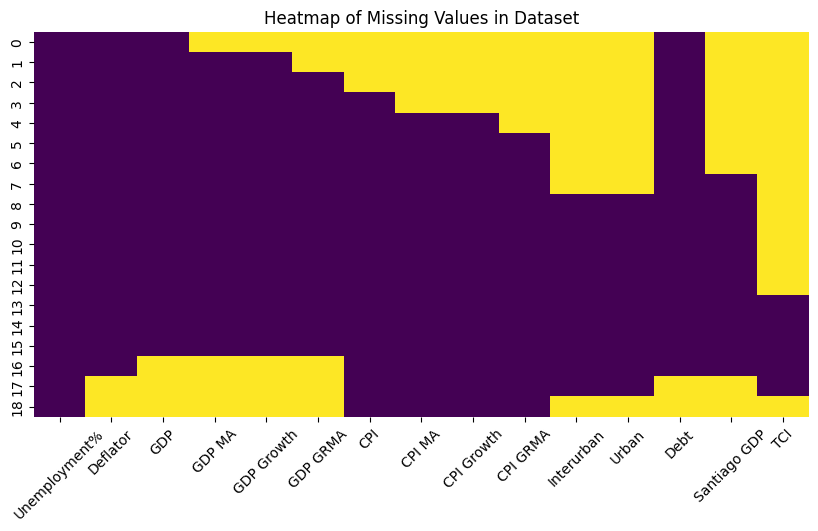

In [72]:
# Plotting the heatmap
plt.figure(figsize=(10, 5))
ax = sns.heatmap(df_excluded.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Dataset')

# Custom labels for the x-axis
labels = ['Unemployment%', 'Deflator', 'GDP', 'GDP MA', 'GDP Growth', 'GDP GRMA', 'CPI', 'CPI MA', 'CPI Growth', 'CPI GRMA', 'Interurban', 'Urban', 'Debt', 'Santiago GDP', 'TCI']
ax.set_xticklabels(labels, rotation = 45)

#plt.grid(True)

plt.show()

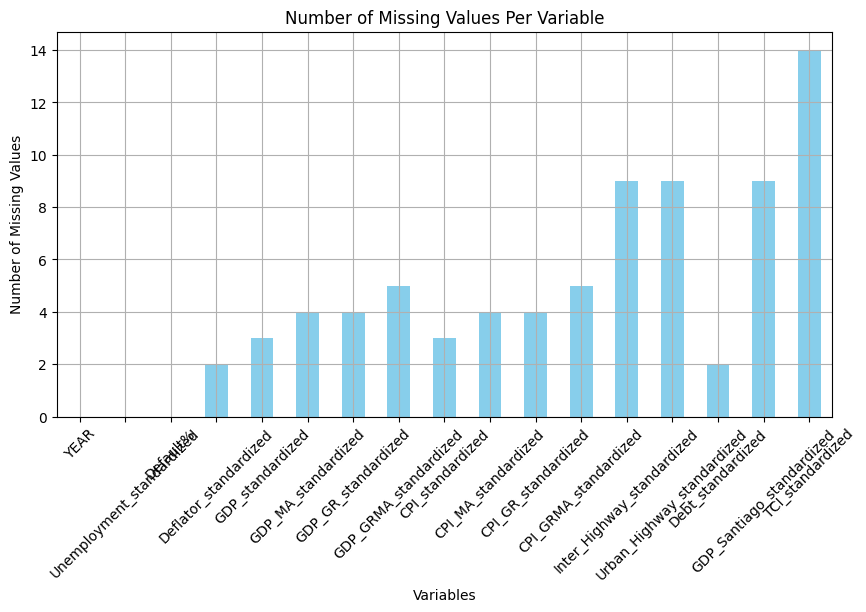

In [73]:
missing_values = merged_df.isnull().sum()

# Plotting the number of missing values
plt.figure(figsize=(10, 5))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Number of Missing Values Per Variable')
plt.xlabel('Variables')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Multivariate Regression

## With All VARIABLES
unavailable

In [74]:
df_all = merged_df.dropna()
df_all
# NOT AVAILABLE

,YEAR,Unemployment_standardized,Default%,Deflator_standardized,GDP_standardized,GDP_MA_standardized,GDP_GR_standardized,GDP_GRMA_standardized,CPI_standardized,CPI_MA_standardized,CPI_GR_standardized,CPI_GRMA_standardized,Inter_Highway_standardized,Urban_Highway_standardized,Debt_standardized,GDP_Santiago_standardized,TCI_standardized
13,2019,-0.459128,10.8227,-0.753430,0.188840,0.560726,-0.248398,0.528969,0.184803,0.157028,-0.612348,-0.800497,0.805290,0.710364,1.378116,0.443781,-0.874310
14,2020,2.179892,14.5762,1.499088,-3.166652,-1.962670,-2.327137,-2.540012,0.361007,0.320730,-0.303530,-0.628043,-0.176812,-1.784037,1.402263,0.235922,-0.826796
15,2021,0.787076,15.3499,0.593730,0.234152,-1.932077,2.516388,0.404427,0.630950,0.561016,0.277620,-0.091649,0.877254,0.450595,0.882195,1.233697,-0.564773


In [75]:
nan_counts = merged_df.isna().sum()
nan_counts

YEAR                           0
Unemployment_standardized      0
Default%                       0
Deflator_standardized          2
GDP_standardized               3
GDP_MA_standardized            4
GDP_GR_standardized            4
GDP_GRMA_standardized          5
CPI_standardized               3
CPI_MA_standardized            4
CPI_GR_standardized            4
CPI_GRMA_standardized          5
Inter_Highway_standardized     9
Urban_Highway_standardized     9
Debt_standardized              2
GDP_Santiago_standardized      9
TCI_standardized              14
dtype: int64

In [76]:
column_name = ['TCI_standardized']
new_df = merged_df.drop(columns=column_name)
new_df

,YEAR,Unemployment_standardized,Default%,Deflator_standardized,GDP_standardized,GDP_MA_standardized,GDP_GR_standardized,GDP_GRMA_standardized,CPI_standardized,CPI_MA_standardized,CPI_GR_standardized,CPI_GRMA_standardized,Inter_Highway_standardized,Urban_Highway_standardized,Debt_standardized,GDP_Santiago_standardized
0,2006,0.127321,3.2722,2.363925,0.828314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.878668,NaN
1,2007,-0.605740,4.8319,0.048813,1.021430,1.296692,0.150616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.482802,NaN
2,2008,-0.019291,5.7514,-1.474466,0.698284,1.208900,-0.206041,0.143853,NaN,NaN,NaN,NaN,NaN,NaN,-0.941184,NaN
3,2009,2.399810,6.5448,-0.432937,-1.348267,-0.391019,-1.402068,-1.509724,-1.251736,NaN,NaN,NaN,NaN,NaN,-0.749750,NaN
4,2010,0.347239,9.4427,1.250405,-0.625111,-1.284519,0.533871,-0.721733,-1.190261,-1.288444,-0.943483,NaN,NaN,NaN,-0.948517,NaN
5,2011,-0.385822,10.1237,-0.534097,0.081233,-0.319381,0.516405,1.321401,-1.042833,-1.175932,-0.187399,-0.757628,NaN,NaN,-0.764832,NaN
6,2012,-0.898964,10.7576,-1.330246,0.611661,0.515635,0.388107,1.166165,-0.905744,-1.022697,-0.318638,-0.381028,NaN,NaN,-0.534287,NaN
7,2013,-1.265495,6.8015,-0.852852,0.767137,0.978728,0.124909,0.749230,-0.814932,-0.899954,-0.739362,-0.713702,NaN,NaN,-0.242824,-1.531114
8,2014,-0.972270,7.4191,0.292446,0.293589,0.763980,-0.311050,0.004642,-0.604409,-0.737661,0.226704,-0.385017,-1.388561,-1.496619,0.070876,-1.221250
9,2015,-1.118882,8.1544,0.005964,0.154362,0.350260,-0.080145,-0.213735,-0.386786,-0.507070,0.209829,0.187071,-1.220877,-0.819268,0.355402,-0.760303


In [77]:
df_new_corr = new_df.dropna()
df_new_corr

,YEAR,Unemployment_standardized,Default%,Deflator_standardized,GDP_standardized,GDP_MA_standardized,GDP_GR_standardized,GDP_GRMA_standardized,CPI_standardized,CPI_MA_standardized,CPI_GR_standardized,CPI_GRMA_standardized,Inter_Highway_standardized,Urban_Highway_standardized,Debt_standardized,GDP_Santiago_standardized
8,2014,-0.972270,7.4191,0.292446,0.293589,0.763980,-0.311050,0.004642,-0.604409,-0.737661,0.226704,-0.385017,-1.388561,-1.496619,0.070876,-1.221250
9,2015,-1.118882,8.1544,0.005964,0.154362,0.350260,-0.080145,-0.213735,-0.386786,-0.507070,0.209829,0.187071,-1.220877,-0.819268,0.355402,-0.760303
10,2016,-0.825658,9.9478,-0.119565,-0.115416,0.074117,-0.171591,-0.065215,-0.189218,-0.283457,-0.012147,0.043112,-0.977581,-0.211828,0.531033,-0.376671
11,2017,-0.605740,9.9008,-0.034265,-0.194398,-0.161351,-0.038457,-0.020818,-0.071001,-0.113381,-0.641133,-0.469772,-0.670670,0.279555,0.736673,-0.136279
12,2018,-0.312515,9.6684,-1.066654,0.570839,0.301979,0.554591,0.752551,0.057057,0.019257,-0.589660,-0.817846,0.023690,0.495745,1.042763,0.213378
13,2019,-0.459128,10.8227,-0.753430,0.188840,0.560726,-0.248398,0.528969,0.184803,0.157028,-0.612348,-0.800497,0.805290,0.710364,1.378116,0.443781
14,2020,2.179892,14.5762,1.499088,-3.166652,-1.962670,-2.327137,-2.540012,0.361007,0.320730,-0.303530,-0.628043,-0.176812,-1.784037,1.402263,0.235922
15,2021,0.787076,15.3499,0.593730,0.234152,-1.932077,2.516388,0.404427,0.630950,0.561016,0.277620,-0.091649,0.877254,0.450595,0.882195,1.233697


In [78]:
# Prepare data for OLS regression
X = df_new_corr[['Unemployment_standardized', 'Deflator_standardized', 'GDP_standardized', 'GDP_MA_standardized', 'GDP_GR_standardized', 'GDP_GRMA_standardized', 'CPI_standardized', 'CPI_MA_standardized', 'CPI_GR_standardized', 'CPI_GRMA_standardized', 'Inter_Highway_standardized', 'Urban_Highway_standardized', 'Debt_standardized', 'GDP_Santiago_standardized']]
X = sm.add_constant(X)  # adding a constant to the model
y = df_new_corr['Default%']

# Fit OLS model
all_model = sm.OLS(y, X).fit()

# Print the summary of the OLS model
print(all_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Default%   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 04 May 2024   Prob (F-statistic):                nan
Time:                        05:55:19   Log-Likelihood:                 250.73
No. Observations:                   8   AIC:                            -485.5
Df Residuals:                       0   BIC:                            -484.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


## SELECTED Variables - by Number of Observation


In [111]:
df_by_length = new_df[['YEAR', 'Unemployment_standardized', 'Deflator_standardized', 'GDP_standardized', 'GDP_MA_standardized', 'GDP_GR_standardized', 'GDP_GRMA_standardized', 'CPI_standardized', 'CPI_MA_standardized', 'CPI_GR_standardized', 'Debt_standardized', 'Default%']]
df_by_length

,YEAR,Unemployment_standardized,Deflator_standardized,GDP_standardized,GDP_MA_standardized,GDP_GR_standardized,GDP_GRMA_standardized,CPI_standardized,CPI_MA_standardized,CPI_GR_standardized,Debt_standardized,Default%
0,2006,0.127321,2.363925,0.828314,NaN,NaN,NaN,NaN,NaN,NaN,-1.878668,3.2722
1,2007,-0.605740,0.048813,1.021430,1.296692,0.150616,NaN,NaN,NaN,NaN,-1.482802,4.8319
2,2008,-0.019291,-1.474466,0.698284,1.208900,-0.206041,0.143853,NaN,NaN,NaN,-0.941184,5.7514
3,2009,2.399810,-0.432937,-1.348267,-0.391019,-1.402068,-1.509724,-1.251736,NaN,NaN,-0.749750,6.5448
4,2010,0.347239,1.250405,-0.625111,-1.284519,0.533871,-0.721733,-1.190261,-1.288444,-0.943483,-0.948517,9.4427
5,2011,-0.385822,-0.534097,0.081233,-0.319381,0.516405,1.321401,-1.042833,-1.175932,-0.187399,-0.764832,10.1237
6,2012,-0.898964,-1.330246,0.611661,0.515635,0.388107,1.166165,-0.905744,-1.022697,-0.318638,-0.534287,10.7576
7,2013,-1.265495,-0.852852,0.767137,0.978728,0.124909,0.749230,-0.814932,-0.899954,-0.739362,-0.242824,6.8015
8,2014,-0.972270,0.292446,0.293589,0.763980,-0.311050,0.004642,-0.604409,-0.737661,0.226704,0.070876,7.4191
9,2015,-1.118882,0.005964,0.154362,0.350260,-0.080145,-0.213735,-0.386786,-0.507070,0.209829,0.355402,8.1544


In [110]:
while True:
    # Drop rows with missing values
    df_cleaned = df_by_length.dropna()

    # Add constant for intercept
    X_cleaned = sm.add_constant(df_cleaned.drop(['YEAR', 'Default%'], axis=1))
    y_cleaned = df_cleaned['Default%']

    # Fit OLS model
    model = sm.OLS(y_cleaned, X_cleaned).fit()

    # Get p-values and exclued p-value of const
    p_values = model.pvalues
    p_values = p_values.drop('const')

    # Find the variable with the highest p-value
    variable_to_drop = p_values.idxmax()

    # Break loop if highest p-value is significant
    if p_values.max() < 0.05:
        break

    # Drop the variable with the highest p-value from the original DataFrame
    df_by_length.drop(variable_to_drop, axis=1, inplace=True)

print("Final DataFrame after backward selection:")
print(model.summary())

Final DataFrame after backward selection:
                            OLS Regression Results                            
Dep. Variable:               Default%   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     22.85
Date:                Sat, 04 May 2024   Prob (F-statistic):           0.000359
Time:                        07:04:45   Log-Likelihood:                -29.378
No. Observations:                  15   AIC:                             62.76
Df Residuals:                      13   BIC:                             64.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

<ipython-input-110-92b81739edb4>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_length.drop(variable_to_drop, axis=1, inplace=True)
<ipython-input-110-92b81739edb4>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_length.drop(variable_to_drop, axis=1, inplace=True)
<ipython-input-110-92b81739edb4>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_length.drop(variable_to_drop, axis=1, inplace=True)
<ipython-input-1

In [112]:
prev_adj_r_squared = -float('inf')
while True:
    # Drop rows with missing values
    df_cleaned = df_by_length.dropna()

    # Add constant for intercept
    X_cleaned = sm.add_constant(df_cleaned.drop(['YEAR', 'Default%'], axis=1))
    y_cleaned = df_cleaned['Default%']

    # Fit OLS model
    model = sm.OLS(y_cleaned, X_cleaned).fit()

    # Get p-values and exclued p-value of const
    p_values = model.pvalues
    p_values = p_values.drop('const')

    # Find the variable with the highest p-value and calcualte adjusted R^2
    variable_to_drop = p_values.idxmax()
    adj_r_squared = model.rsquared_adj

    # Check for improvement in adjusted R-squared
    if adj_r_squared <= prev_adj_r_squared:
        break

    else:
      # Drop the variable with the highest p-value from the original DataFrame
      df_by_length.drop(variable_to_drop, axis=1, inplace=True)
      prev_adj_r_squared = adj_r_squared

print("Final DataFrame after backward selection:")
print(model.summary())

Final DataFrame after backward selection:
                            OLS Regression Results                            
Dep. Variable:               Default%   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     5.647
Date:                Sat, 04 May 2024   Prob (F-statistic):             0.0121
Time:                        07:05:22   Log-Likelihood:                -28.126
No. Observations:                  15   AIC:                             66.25
Df Residuals:                      10   BIC:                             69.79
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

<ipython-input-112-b11815664cf7>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_length.drop(variable_to_drop, axis=1, inplace=True)
<ipython-input-112-b11815664cf7>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_length.drop(variable_to_drop, axis=1, inplace=True)
<ipython-input-112-b11815664cf7>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_length.drop(variable_to_drop, axis=1, inplace=True)
<ipython-input-1